# Iamge Classification

On this lab, we will use the CIFAR10 dataset and try to build a classifier model.

CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

# Import Library

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Download Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"X_train: {X_train.shape}") # 50000, 32, 32, 3
print(f"y_train: {y_train.shape}") # 50000, 1
print(f"X_test: {X_test.shape}")   # 10000, 32, 32, 3
print(f"y_test: {y_test.shape}")   # 10000, 1

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train: (50000, 32, 32, 3)
y_train: (50000, 1)
X_test: (10000, 32, 32, 3)
y_test: (10000, 1)


# Data exploratory

## Let's take a look what kind of dataset is it

<ipython-input-3-4ba82da05a27>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lbl_idx = int(y_train[idx])


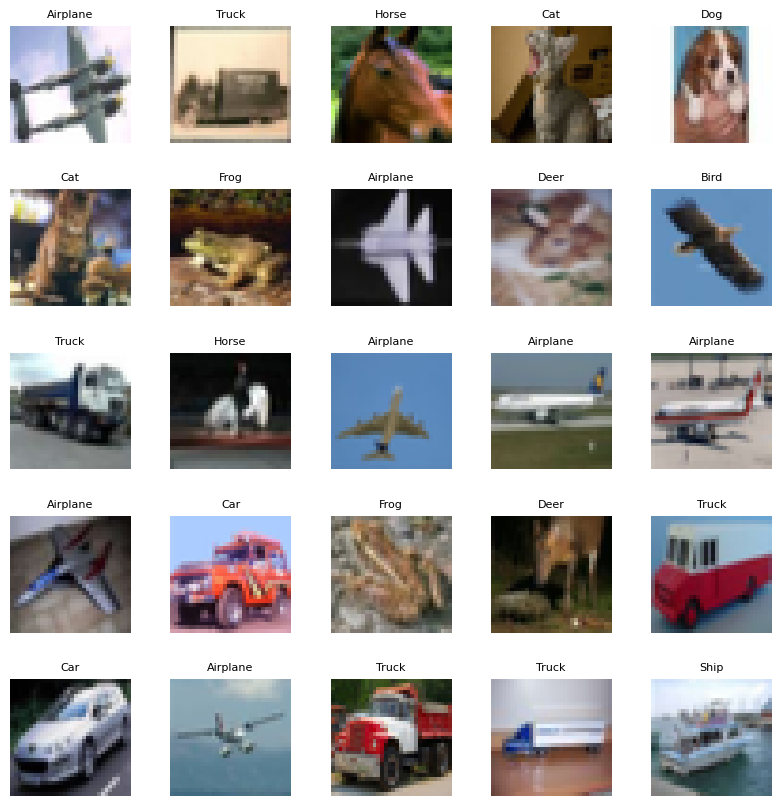

In [3]:
lbls = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots(5,5, figsize = (10,10))
axes = axes.ravel()
for i in np.arange(0, 5*5):
    idx = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[idx,1:])
    lbl_idx = int(y_train[idx])
    axes[i].set_title(lbls[lbl_idx], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## After that, let's take a look to class distribution in CIFAR10 Dataset

Text(0.5, 1.0, 'Class distribution in training set')

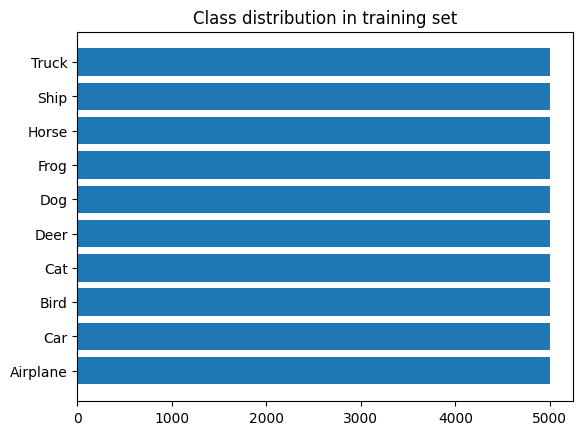

In [4]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(lbls, counts)
plt.title('Class distribution in training set')

# Data Prepropessing

Data preprocessing prepares images and labels to help a neural network better recognize features. This involves several steps:
1. Normalizing the images.
2. Converting labels into a one-hot encoded format.
3. Splitting the data into training, validation, and test sets.
4. Applying data augmentation techniques.

## Image Normalization

Image normalization always use number 255 to divide every number in dataset. It is use to simplify the range of pixel that is from 0 - 255. If data have smaller number, then the building model process will be more efficient.

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## One-hot Encoding Process

In this case we are handling multi-class classification, so one of many way to handle the multi-class label is One-Hot Encoding

In [6]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

## Splitting Data

In [7]:
X_TRAIN, X_VAL, Y_TRAIN, Y_VAL = train_test_split(X_train,
                                                y_train_cat,
                                                test_size=0.2,
                                                random_state=42)

## Data Augmentation

This step is to make sure the model could learn many things from current dataset. There is many ways to do it, such as horizontal flip, rotation, black and white, and so on.

In this case we will use a simple one. Make sure you experiment and try other augmentation techniques too.

In [8]:
batch_size = 64
data_generator = ImageDataGenerator(horizontal_flip=True)

train_generator = data_generator.flow(X_TRAIN, Y_TRAIN, batch_size)

# Build Model

In [9]:
INPUT_SHAPE = (32, 32, 3)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,938 (323.98 KB)

 Trainable params: 82,746 (323.23 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=(X_VAL, Y_VAL),
                    )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3369 - loss: 1.8061 - val_accuracy: 0.5296 - val_loss: 1.2759
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5747 - loss: 1.1851 - val_accuracy: 0.6394 - val_loss: 1.0264
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6492 - loss: 0.9903 - val_accuracy: 0.6527 - val_loss: 0.9916
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6863 - loss: 0.8946 - val_accuracy: 0.7015 - val_loss: 0.8579
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.8274 - val_accuracy: 0.7220 - val_loss: 0.8057
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7261 - loss: 0.7774 - val_accuracy: 0.7059 - val_loss: 0.8626
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7406 - loss: 0.7389 - val_accuracy: 0.7162 - val_loss: 0.8035
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7537 - loss: 0.6956 - val_accuracy: 0.7361 - v

# Model Evaluation

After build and train classifier model. The next step is to check if the model performance is good enough or not.

## Accuracy and Loss Graph

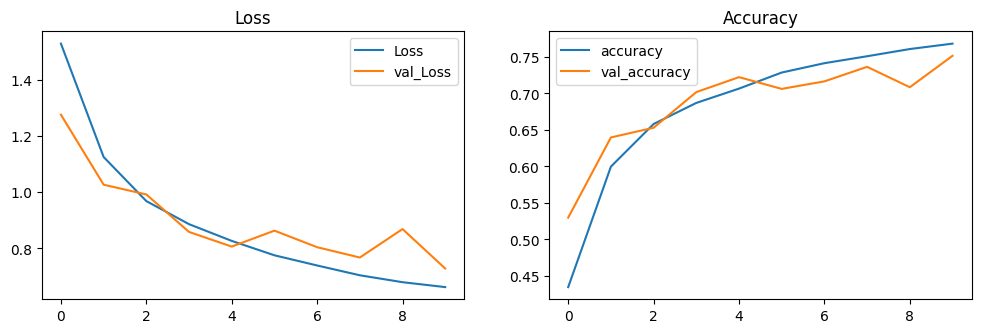

In [12]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

## Classification Report and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.93      0.80      0.86      1000
           2       0.62      0.59      0.61      1000
           3       0.57      0.49      0.53      1000
           4       0.68      0.74      0.71      1000
           5       0.60      0.69      0.64      1000
           6       0.79      0.84      0.81      1000
           7       0.80      0.83      0.81      1000
           8       0.83      0.86      0.85      1000
           9       0.84      0.85      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



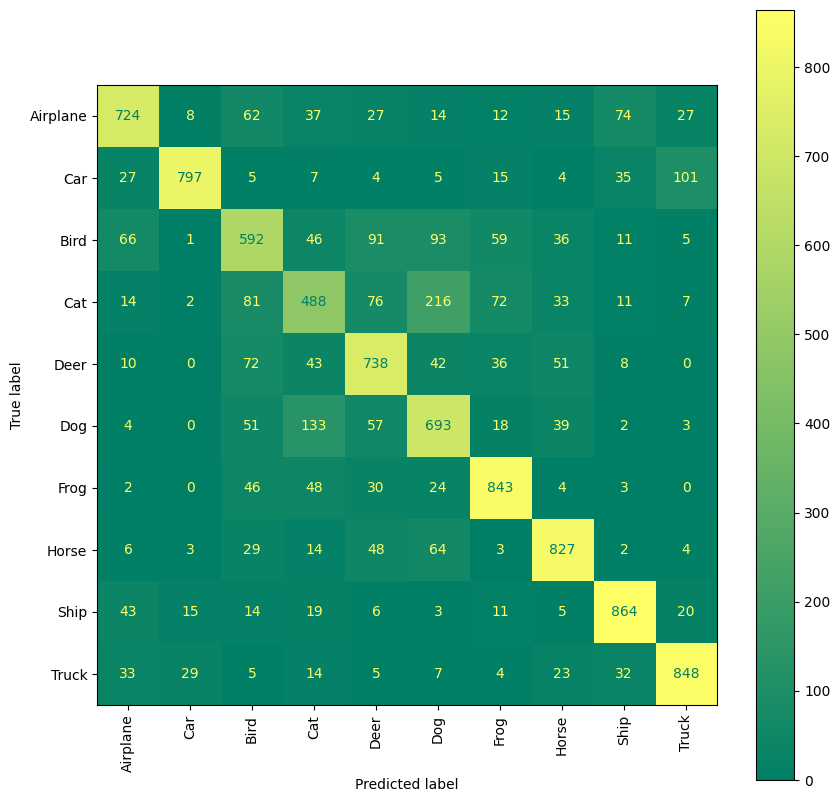

In [18]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

con = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lbls)

fig, ax = plt.subplots(figsize=(10, 10))
con = con.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()